# Estimating Pi using Monte Carlo Simulation

Welcome! The following notebook will walk you through the steps to build up a simulation to estimate the value of Pi. 

Script to simulate rain in a square field. Counting the number of rain drops in the inscribed circle of radius equal to the length of the field. The ratio of the number of drops in the circle to the total number of drops gives Pi.

Insert gif / png here

## Setting Up Function

We will need to first import all the python libraries we will need later on. We will need random to generate some random rain drops for us, matplotlib as the visualisation tool. 

In [41]:
# Step 1
# Import all the libraries we will need
from random import random
import matplotlib.pyplot as plt

You will need to build a function rain_drop that returns a random rain drop with the coordinate (x,y) such that -0.5 < x,y < 0.5. 

In [33]:
# Step 2
# Build a function that initiate a random rain drop

def rain_drop(length_of_field=1):
    """
    Simulate a random rain drop
    """
    return [(.5 - random()) * length_of_field, (.5 - random()) * length_of_field]

Test if the function rain_drop works as expected in the cell below.

In [44]:
print(rain_drop())

[-0.01321944303471323, 0.12856202852727439]


Build a function is_point_in_circle to check if a given point is in inscribed circule. Return


In [34]:
# Step 3
# Build a function to check if the point is in inscribed circle

def is_point_in_circle(point, length_of_field=1):
    """
    Return True if point is in inscribed circle
    """
    return (point[0]) ** 2 + (point[1]) ** 2 <= (length_of_field / 2) ** 2

Test if the function is_point_in_circle works as expected in the cell below. It should retrun False from the first line, True from the second and third line. 

In [50]:
print(is_point_in_circle((1,1))) # False
print(is_point_in_circle((0.5,0))) # True
print(is_point_in_circle((0,0.5))) # True

False
True
True


In [35]:
# Step 4
# Build a function to start the simulation 

def rain(number_of_drops=1000, vis='Web',length_of_field=1, plot=True, format='pdf', dynamic=0):
    """
    Function to make rain drops.
    """
    number_of_drops_in_circle = 0
    drops_in_circle = []
    drops_out_of_circle = []
    pi_estimate = []
    for k in range(number_of_drops):
        d = (rain_drop(length_of_field))
        if is_point_in_circle(d, length_of_field):
            drops_in_circle.append(d)
            number_of_drops_in_circle += 1
        else:
            drops_out_of_circle.append(d)
        
        pi_estimate.append(4 * number_of_drops_in_circle / (k + 1))  # This updates the list with the newest estimate for pi.
    
    return [number_of_drops_in_circle, number_of_drops, drops_in_circle, drops_out_of_circle, pi_estimate]

In [36]:
def plot_rain_drops_matplotlib(drops_in_circle, drops_out_of_circle, length_of_field=1, format='pdf'):
    """ Function to draw rain drops """
    number_of_drops_in_circle = len(drops_in_circle)
    number_of_drops_out_of_circle = len(drops_out_of_circle)
    number_of_drops = number_of_drops_in_circle + number_of_drops_out_of_circle
    plt.figure()
    plt.xlim(-length_of_field / 2, length_of_field / 2)
    plt.ylim(-length_of_field / 2, length_of_field / 2)
    plt.scatter([e[0] for e in drops_in_circle], [e[1] for e in drops_in_circle], color='blue', label="Drops in circle")
    plt.scatter([e[0] for e in drops_out_of_circle], [e[1] for e in drops_out_of_circle], color='black', label="Drops out of circle")
    plt.legend(loc="center")
    plt.title("%s drops: %s landed in circle, estimating $\pi$ as %.4f." % (number_of_drops, number_of_drops_in_circle, 4 * number_of_drops_in_circle / number_of_drops))
    plt.savefig("%s_drops.%s" % (number_of_drops, format))


## Start the simulation 

We have done all the hard work setting up all the necessary functions, now we can start the simulation by starting the rain.

In [37]:
# Step 5
# Call the function rain with arguments

number_of_drops = 100
visualisation = 'web'
Result = rain(number_of_drops, vis=visualisation, plot=True, format='png', dynamic=0, )

Result[0] = number_of_drops_in_circle
Result[1] = number_of_drops 
Result[2] = drops_in_circle
Result[3] = drops_out_of_circle
Result[4] = pi_estimate

print(Result[0], Result[1])

78 100


In [38]:
# Step 6 
# Compute the value of pi

print('Pi estimated to be',4 * r[0] / r[1])
# This bit is a bit complicated, we're passing the output of a function directly into another function. 
# It may sound weird but it's no different than putting a variable in as an argument.


Pi estimated to be 3.16


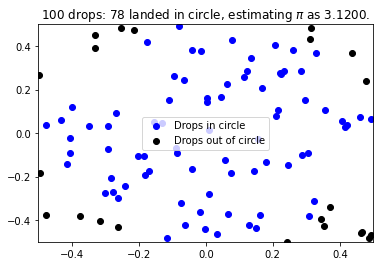

In [39]:
# Step 7 
# Visualisation - Let's double check what is the rain drops look like, the best way would be to visulise it

plot_rain_drops_matplotlib(drops_in_circle, drops_out_of_circle, 1, 'jpg')